# Name: Margaret Nguyen

# Machine Learning: Principal Component Analysis (PCA)

**Assignment: Conduct principal component analysis (PCA) on the variables you used to generate the scatter plots from the df_pa_crash and determine how many components would adequately explain the variance in the samples.**

In [1]:
# Import packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

**Create a 'df_pa_filtered' sub-dataframe to remove unnecessary string columns, handle NaN values, and calculate per capita values.**

In [2]:
# Read the csv file 
df_pa_crash = pd.read_csv('/Users/margaret06/Documents/GitHub/Carlisle_Borough_Transportation_Study/data/df_pa_crash.csv')

# Clean datasets
df_pa_crash = df_pa_crash.drop(columns = ['Unnamed: 0'])

# Select columns with numeric data types (int or float) using select_dtypes
numeric_columns = df_pa_crash.select_dtypes(include=['number'])

# Create a new DataFrame with only the numeric columns
df_pa_filtered = df_pa_crash[numeric_columns.columns]

# Drop unnessary columns
df_pa_filtered = df_pa_filtered.drop(['PENN_DOT_MUNI_ID', 'state', 'county', 'county_subdivision', 'LAND_AREA.1', 'PENN_DOT_COUNTY_NUM', 'FEDERAL_EIN_CODE', 'HOME_RULE_YEAR', 'INCORPORATION_YEAR', 'MUNICIPALITY'], axis=1)

# Replace NaN values with 0 in the entire DataFrame
df_pa_filtered = df_pa_filtered.fillna(0)

# Reset index
df_pa_filtered.reset_index(inplace = True, drop = True)

# Make a copy of dataframe to use later
df_pa_filtered_2 = df_pa_filtered.copy()

In [3]:
# Define the columns for which you want to calculate per capita values
columns_to_convert = [
    'LAND_AREA', 'BIKE_TO_WORK_EST', 'BIKE_TO_WORK_MARG',
    'WALK_TO_WORK_EST', 'WALK_TO_WORK_MARG', 'DRIVE_SOLO_TO_WORK_EST',
    'DRIVE_SOLO_TO_WORK_MARG', 'CARPOOL_TO_WORK_EST',
    'CARPOOL_TO_WORK_MARG', 'PUBTRANS_TO_WORK_EST',
    'PUBTRANS_TO_WORK_MARG', 'EMPLOYEES_FULL_TIME',
    'EMPLOYEES_PART_TIME', 'AUTOMOBILE_COUNT',
    'BICYCLE_BY_AUTO_COUNT', 'BICYCLE_DEATH_BY_AUTO_COUNT',
    'BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT', 'PED_BY_AUTO_COUNT',
    'PED_DEATH_BY_AUTO_COUNT', 'PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT',
    'BICYCLE_SOLO_COUNT', 'BICYCLE_DEATH_SOLO_COUNT',
    'BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT', 'PED_SOLO_COUNT',
    'PED_DEATH_SOLO_COUNT', 'PED_SUSP_SERIOUS_INJ_SOLO_COUNT'
]

# Create new columns with "_PER_CAPITA" suffix by dividing each column by 'POPULATION'
for column in columns_to_convert:
    new_column_name = column + '_PER_CAPITA'
    df_pa_filtered[new_column_name] = df_pa_filtered[column] / df_pa_filtered['POPULATION']

In [4]:
# View dataframe
df_pa_filtered.head()

,POPULATION,LAND_AREA,BIKE_TO_WORK_EST,BIKE_TO_WORK_MARG,WALK_TO_WORK_EST,WALK_TO_WORK_MARG,DRIVE_SOLO_TO_WORK_EST,DRIVE_SOLO_TO_WORK_MARG,CARPOOL_TO_WORK_EST,CARPOOL_TO_WORK_MARG,...,BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT_PER_CAPITA,PED_BY_AUTO_COUNT_PER_CAPITA,PED_DEATH_BY_AUTO_COUNT_PER_CAPITA,PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT_PER_CAPITA,BICYCLE_SOLO_COUNT_PER_CAPITA,BICYCLE_DEATH_SOLO_COUNT_PER_CAPITA,BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT_PER_CAPITA,PED_SOLO_COUNT_PER_CAPITA,PED_DEATH_SOLO_COUNT_PER_CAPITA,PED_SUSP_SERIOUS_INJ_SOLO_COUNT_PER_CAPITA
0,125250,17.6,79,51,2396,607,36549,1464,8407,817,...,0.000032,0.000248,0.000016,0.000232,0.000000,0.0,0.000000,0.000168,0.000008,0.000160
1,44114,9.9,4,6,761,210,14943,816,1391,269,...,0.000023,0.000136,0.000023,0.000113,0.000045,0.0,0.000045,0.000136,0.000000,0.000136
2,3268,1.8,0,11,0,11,1397,231,109,79,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,4438,0.9,0,11,75,56,1404,197,108,64,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000225,0.000225,0.000000
4,1600,0.4,0,11,25,14,686,125,76,52,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [5]:
# Check for the columns' names
df_pa_filtered.columns

Index(['POPULATION', 'LAND_AREA', 'BIKE_TO_WORK_EST', 'BIKE_TO_WORK_MARG',
       'WALK_TO_WORK_EST', 'WALK_TO_WORK_MARG', 'DRIVE_SOLO_TO_WORK_EST',
       'DRIVE_SOLO_TO_WORK_MARG', 'CARPOOL_TO_WORK_EST',
       'CARPOOL_TO_WORK_MARG', 'PUBTRANS_TO_WORK_EST', 'PUBTRANS_TO_WORK_MARG',
       'EMPLOYEES_FULL_TIME', 'EMPLOYEES_PART_TIME', 'AUTOMOBILE_COUNT',
       'BICYCLE_DEATH_BY_AUTO_COUNT', 'BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT',
       'PED_DEATH_BY_AUTO_COUNT', 'PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT',
       'BICYCLE_DEATH_SOLO_COUNT', 'BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT',
       'PED_DEATH_SOLO_COUNT', 'PED_SUSP_SERIOUS_INJ_SOLO_COUNT', 'BNA Score',
       'BICYCLE_BY_AUTO_COUNT', 'PED_BY_AUTO_COUNT', 'BICYCLE_SOLO_COUNT',
       'PED_SOLO_COUNT', 'LAND_AREA_PER_CAPITA', 'BIKE_TO_WORK_EST_PER_CAPITA',
       'BIKE_TO_WORK_MARG_PER_CAPITA', 'WALK_TO_WORK_EST_PER_CAPITA',
       'WALK_TO_WORK_MARG_PER_CAPITA', 'DRIVE_SOLO_TO_WORK_EST_PER_CAPITA',
       'DRIVE_SOLO_TO_WORK_MARG_PER

In [6]:
# Check for the columns' length
df_pa_filtered.columns
print(len(df_pa_filtered.columns))

54


### Credit:

The following code is based on the work of my supervisor, Mitch Shiles. The original code can be found at this link: [Mitch Shiles' GitHub](https://github.com/rmshiles/Textiles-Spectroscopy-and-Supervised-Learning/blob/master/spectral%20analysis%20Final%20version.ipynb).

In [7]:
# Normalize the features
pa_scaler = StandardScaler()
pa_std = pa_scaler.fit_transform(df_pa_filtered)

In [8]:
#create a function to display the explained Variance related to principle components
def Number_of_Principle_Components(X_standardized,n_components):
    #Dimensionality reduction 
    # conduct principle compenent analysis on the data and examine the explained variance of the components
    from sklearn.decomposition import PCA
    sklearn_pca = PCA(n_components=n_components)
    Y_sklearn = sklearn_pca.fit_transform(X_standardized)
    pca = sklearn_pca.fit_transform(pa_std)
    plt.plot(sklearn_pca.explained_variance_ratio_)
    plt.show()
    print(
        'The percentage of total variance in the dataset explained by each',
        'component from Sklearn PCA.\n',
        sklearn_pca.explained_variance_ratio_
    )

    explained_variance = []
    explained_variance = sklearn_pca.explained_variance_ratio_

    total_variace = 0
    total_variace = 0
    components = 0
    num_prints = 0
    print('\n')
    for v in explained_variance:
        total_variace+=v
        components +=1

        if total_variace>=0.5 and total_variace<0.7 and num_prints < 1 :
            print(" to retain {}% of total variance  {} components are required".format(round(100*total_variace,2),components))
            num_prints+=1

        if total_variace>=0.7 and total_variace<0.8 and num_prints < 2 :
            print(" to retain {}% of total variance {} components required".format(round(100*total_variace,2),components))
            num_prints+=1

        elif total_variace>=0.8 and total_variace<0.9 and num_prints < 3 :
            print(" to retain {}% of total variance {} components required".format(round(100*total_variace,2),components))
            num_prints+=1

        elif total_variace>=0.9 and num_prints < 4  :
            print(" to retain {}% of total variance {} components required".format(round(100*total_variace,2),components))
            num_prints+=1

        else:
            None

    print(sum(explained_variance))

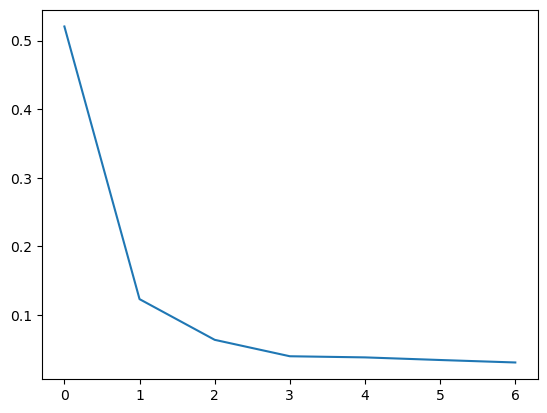

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.52061845 0.12304505 0.06369026 0.03973406 0.03807948 0.0342624
 0.03065948]


 to retain 52.06% of total variance  1 components are required
 to retain 70.74% of total variance 3 components required
 to retain 81.94% of total variance 6 components required
0.8500891765664933


In [9]:
Number_of_Principle_Components(pa_std,7)

In [10]:
from sklearn.decomposition import PCA
n_components=7
pca = PCA(n_components)
pa_pca_components = pca.fit_transform(pa_std)
print(pa_pca_components)

[[ 1.66021123e+00 -2.15051513e+00 -1.72932155e+00  9.44071221e-01
  -1.04542323e-01  2.02476959e-01 -7.46861631e-01]
 [-3.58570213e-01 -1.21210035e+00 -4.58944689e-01 -6.74595835e-01
  -2.71239322e-01 -1.42850014e-01 -3.83037284e-01]
 [-2.29100745e+00  2.23355775e+00 -9.86139962e-01 -8.75917875e-01
   4.52014076e-01 -4.53260159e-01 -2.60919139e-01]
 [-1.67830026e+00  5.18005413e-01 -5.27446073e-01  2.39151701e-01
  -1.06695486e+00  1.25526399e+00 -3.27906314e-01]
 [-2.37840679e+00  2.63202587e+00 -3.20425695e-01 -3.29617022e-01
  -4.12132140e-01 -9.23089812e-02  2.58917205e-01]
 [ 4.65928080e-01 -1.46330127e+00 -8.34334574e-01  3.32929417e-01
  -8.16727270e-01 -2.49481573e-01 -6.79335205e-01]
 [-1.78580824e+00  1.14602740e+00 -9.36586917e-01 -2.12167449e-01
  -2.59008245e+00  1.13660750e+00  8.64825229e-01]
 [-1.54537431e+00 -6.22029806e-01 -1.88079597e-01 -4.58422178e-01
   2.70416177e+00 -3.72592841e-01  2.83866775e+00]
 [ 3.06166632e-01 -5.09836509e+00  3.64374288e+00 -4.96845371e-0

In [11]:
df_pa_filtered[["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7"]]=pa_pca_components[:]
df_pa_filtered[["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7"]].head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,1.660211,-2.150515,-1.729322,0.944071,-0.104542,0.202477,-0.746862
1,-0.358570,-1.212100,-0.458945,-0.674596,-0.271239,-0.142850,-0.383037
2,-2.291007,2.233558,-0.986140,-0.875918,0.452014,-0.453260,-0.260919
3,-1.678300,0.518005,-0.527446,0.239152,-1.066955,1.255264,-0.327906
4,-2.378407,2.632026,-0.320426,-0.329617,-0.412132,-0.092309,0.258917


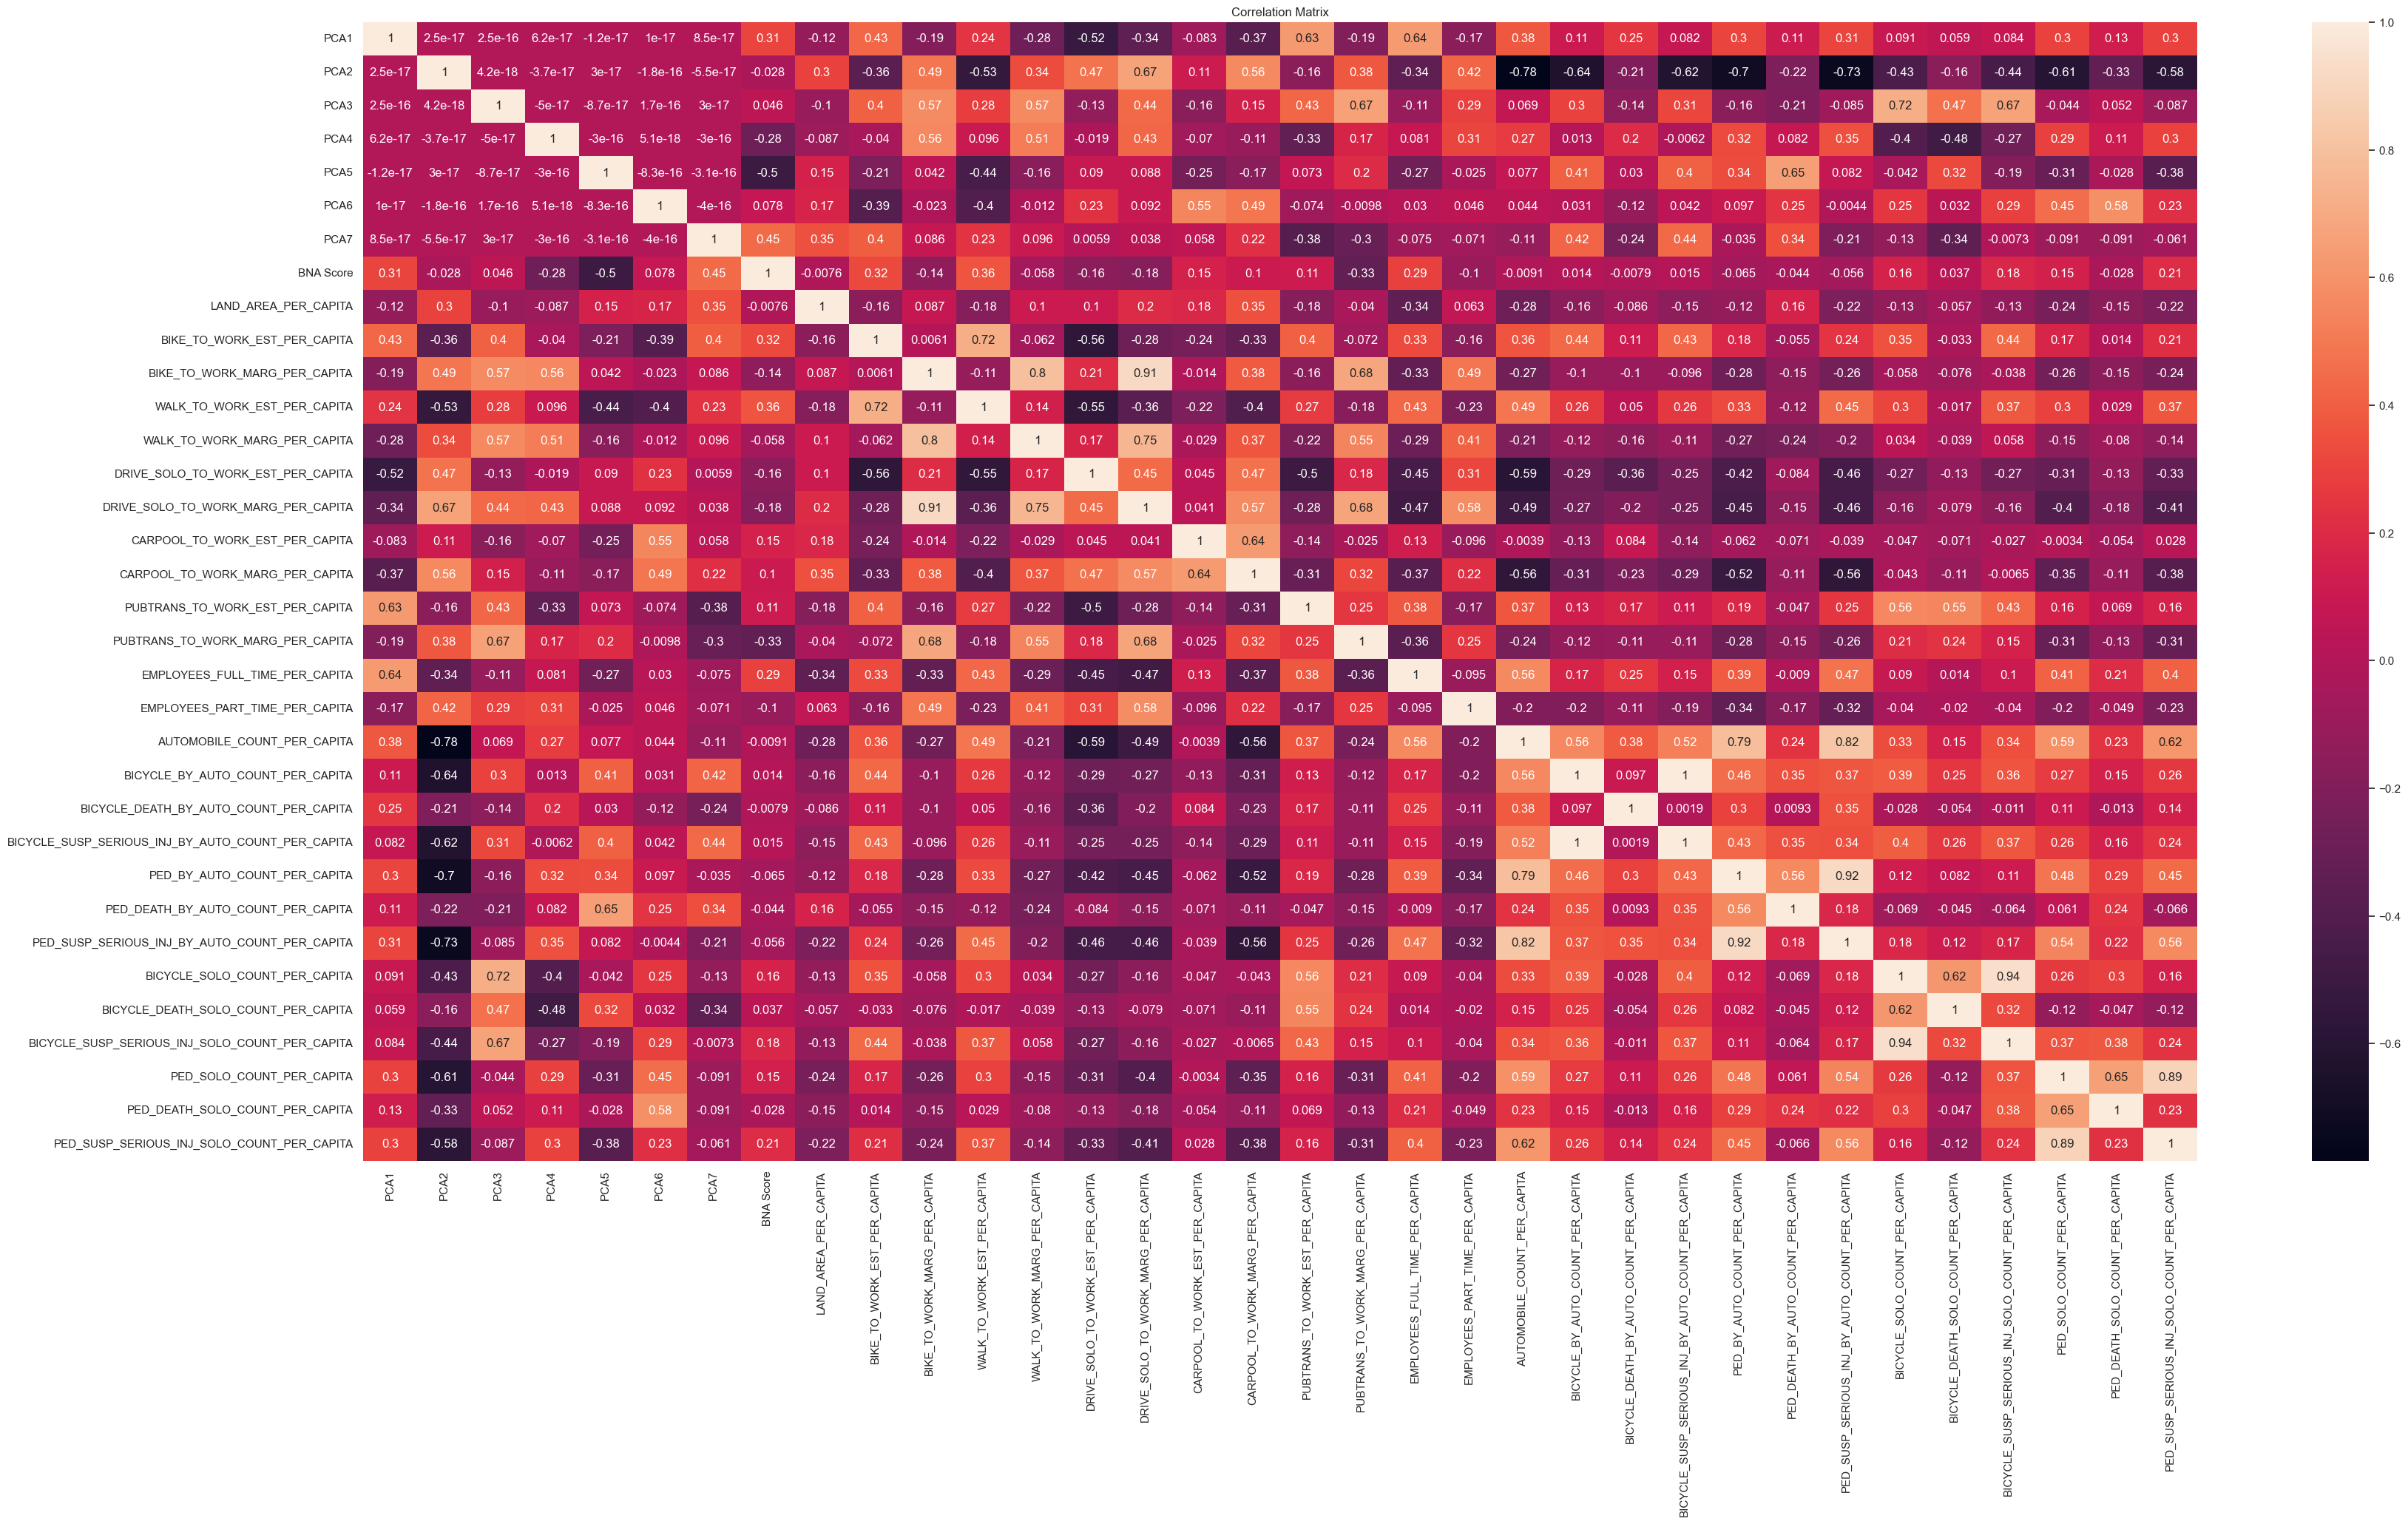

In [12]:
# Create heatmap
import seaborn as sns
heat_corr = df_pa_filtered[[ "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7",'BNA Score',
       'LAND_AREA_PER_CAPITA', 'BIKE_TO_WORK_EST_PER_CAPITA',
       'BIKE_TO_WORK_MARG_PER_CAPITA', 'WALK_TO_WORK_EST_PER_CAPITA',
       'WALK_TO_WORK_MARG_PER_CAPITA', 'DRIVE_SOLO_TO_WORK_EST_PER_CAPITA',
       'DRIVE_SOLO_TO_WORK_MARG_PER_CAPITA', 'CARPOOL_TO_WORK_EST_PER_CAPITA',
       'CARPOOL_TO_WORK_MARG_PER_CAPITA', 'PUBTRANS_TO_WORK_EST_PER_CAPITA',
       'PUBTRANS_TO_WORK_MARG_PER_CAPITA', 'EMPLOYEES_FULL_TIME_PER_CAPITA',
       'EMPLOYEES_PART_TIME_PER_CAPITA', 'AUTOMOBILE_COUNT_PER_CAPITA',
       'BICYCLE_BY_AUTO_COUNT_PER_CAPITA',
       'BICYCLE_DEATH_BY_AUTO_COUNT_PER_CAPITA',
       'BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT_PER_CAPITA',
       'PED_BY_AUTO_COUNT_PER_CAPITA', 'PED_DEATH_BY_AUTO_COUNT_PER_CAPITA',
       'PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT_PER_CAPITA',
       'BICYCLE_SOLO_COUNT_PER_CAPITA', 'BICYCLE_DEATH_SOLO_COUNT_PER_CAPITA',
       'BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT_PER_CAPITA',
       'PED_SOLO_COUNT_PER_CAPITA', 'PED_DEATH_SOLO_COUNT_PER_CAPITA',
       'PED_SUSP_SERIOUS_INJ_SOLO_COUNT_PER_CAPITA']].corr()

plt.figure(figsize=(40,20))
sns.set(rc={ 'figure.facecolor':'w'})
sns.heatmap(heat_corr, annot=True) 
plt.title("Correlation Matrix")
plt.show()

**Implement the PCA model without including the per capita values from 'df_pa_filtered_2'.**

In [13]:
# Normalize the features
pa_scaler = StandardScaler()
pa_std = pa_scaler.fit_transform(df_pa_filtered_2)

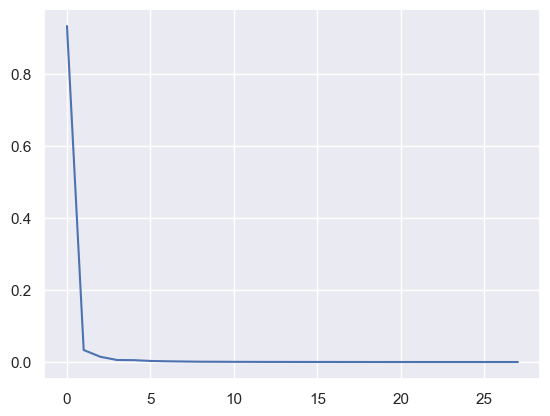

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [9.31915673e-01 3.32437641e-02 1.44647395e-02 5.54891474e-03
 5.13980796e-03 2.92185151e-03 1.97835085e-03 1.39286072e-03
 8.23148380e-04 7.07573315e-04 4.93352169e-04 3.94663367e-04
 2.74513002e-04 2.47705848e-04 1.34305310e-04 1.03611612e-04
 9.25884910e-05 6.21721608e-05 2.91520538e-05 1.72306527e-05
 1.04410855e-05 2.15030366e-06 8.64544820e-07 5.64848987e-07
 8.91364230e-33 8.91364230e-33 8.91364230e-33 8.91364230e-33]


 to retain 93.19% of total variance 1 components required
 to retain 96.52% of total variance 2 components required
 to retain 97.96% of total variance 3 components required
 to retain 98.52% of total variance 4 components required
1.0


In [14]:
Number_of_Principle_Components(pa_std,28)

In [15]:
# Implement the PCA model
n_components=2
pca = PCA(n_components)
pa_pca_components = pca.fit_transform(pa_std)
print(pa_pca_components)

[[ 1.12117038 -0.47115292]
 [-0.56626529  0.36999485]
 [-1.64439699 -0.48769142]
 [-1.53942164  0.51262509]
 [-1.65644217  0.14246482]
 [-0.06760669 -0.30756638]
 [-1.39471957  2.25433019]
 [-1.40670506 -0.11689437]
 [-0.52430052  0.65297355]
 [-0.70967375 -0.52902906]
 [-1.44935429  1.02928617]
 [-0.93668728 -0.49882349]
 [-1.11296738  1.95096942]
 [ 1.16505832  0.66486733]
 [ 0.52483898 -0.37232111]
 [-1.61788875 -1.63987505]
 [ 0.35451011 -0.54337651]
 [-1.21975781 -0.25629089]
 [-0.97107948  0.48525094]
 [-0.74671761 -1.07767261]
 [-1.36070382 -0.44118216]
 [-1.24138837  0.79240248]
 [-1.42580099  2.33244679]
 [-1.39268035 -0.76028891]
 [-1.7590804  -0.84098065]
 [32.44418426  0.17088314]
 [-1.24979533 -0.71199432]
 [-1.17952457 -0.66421628]
 [ 5.91697323 -0.75767198]
 [-0.85918094 -0.20550588]
 [ 0.49355602 -1.25047413]
 [-1.47970544 -0.21755891]
 [-1.53072319 -1.14406671]
 [ 0.05907741 -0.42925089]
 [-1.51784682  0.42362644]
 [ 0.11818377  1.60695304]
 [-1.71636667 -0.99678035]
 

In [16]:
df_pa_filtered_2[["PCA1","PCA2"]]=pa_pca_components[:]
df_pa_filtered_2[["PCA1","PCA2"]].head()

,PCA1,PCA2
0,1.121170,-0.471153
1,-0.566265,0.369995
2,-1.644397,-0.487691
3,-1.539422,0.512625
4,-1.656442,0.142465


In [17]:
# Create the table to visualize the correlations
df_pa_filtered_2[['POPULATION', 'LAND_AREA', 'BIKE_TO_WORK_EST', 'BIKE_TO_WORK_MARG',
       'WALK_TO_WORK_EST', 'WALK_TO_WORK_MARG', 'DRIVE_SOLO_TO_WORK_EST',
       'DRIVE_SOLO_TO_WORK_MARG', 'CARPOOL_TO_WORK_EST',
       'CARPOOL_TO_WORK_MARG', 'PUBTRANS_TO_WORK_EST', 'PUBTRANS_TO_WORK_MARG',
       'EMPLOYEES_FULL_TIME', 'EMPLOYEES_PART_TIME', 'AUTOMOBILE_COUNT',
       'BICYCLE_BY_AUTO_COUNT', 'BICYCLE_DEATH_BY_AUTO_COUNT',
       'BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT', 'PED_BY_AUTO_COUNT',
       'PED_DEATH_BY_AUTO_COUNT', 'PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT',
       'BICYCLE_SOLO_COUNT', 'BICYCLE_DEATH_SOLO_COUNT',
       'BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT', 'PED_SOLO_COUNT',
       'PED_DEATH_SOLO_COUNT', 'PED_SUSP_SERIOUS_INJ_SOLO_COUNT', 'BNA Score', 'PCA1', 'PCA2']].corr()

,POPULATION,LAND_AREA,BIKE_TO_WORK_EST,BIKE_TO_WORK_MARG,WALK_TO_WORK_EST,WALK_TO_WORK_MARG,DRIVE_SOLO_TO_WORK_EST,DRIVE_SOLO_TO_WORK_MARG,CARPOOL_TO_WORK_EST,CARPOOL_TO_WORK_MARG,...,PED_SUSP_SERIOUS_INJ_BY_AUTO_COUNT,BICYCLE_SOLO_COUNT,BICYCLE_DEATH_SOLO_COUNT,BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT,PED_SOLO_COUNT,PED_DEATH_SOLO_COUNT,PED_SUSP_SERIOUS_INJ_SOLO_COUNT,BNA Score,PCA1,PCA2
POPULATION,1.000000,0.927348,0.993286,0.940612,0.992940,0.899297,0.998193,0.940881,0.994852,0.960071,...,0.983498,0.984306,0.976890,0.973528,0.998546,0.995564,0.997906,0.287586,9.981484e-01,-1.264852e-02
LAND_AREA,0.927348,1.000000,0.904862,0.884425,0.928118,0.870249,0.937126,0.914478,0.924884,0.910796,...,0.934224,0.919731,0.890392,0.918689,0.922481,0.921974,0.921069,0.243799,9.324316e-01,-4.967454e-02
BIKE_TO_WORK_EST,0.993286,0.904862,1.000000,0.938310,0.988537,0.863870,0.985732,0.903322,0.979359,0.927710,...,0.965584,0.985018,0.983386,0.971899,0.991830,0.993189,0.989617,0.313712,9.898714e-01,2.451433e-02
BIKE_TO_WORK_MARG,0.940612,0.884425,0.938310,1.000000,0.956662,0.923740,0.941535,0.929465,0.931151,0.913424,...,0.937016,0.951500,0.901344,0.958401,0.937662,0.935002,0.937010,0.344021,9.538213e-01,6.404756e-02
WALK_TO_WORK_EST,0.992940,0.928118,0.988537,0.956662,1.000000,0.919826,0.992131,0.938129,0.982647,0.945619,...,0.989522,0.991662,0.967021,0.987722,0.992061,0.990192,0.991027,0.301580,9.951953e-01,3.547072e-03
WALK_TO_WORK_MARG,0.899297,0.870249,0.863870,0.923740,0.919826,1.000000,0.914411,0.961198,0.911332,0.938357,...,0.943953,0.901945,0.838826,0.914763,0.898044,0.881489,0.902536,0.264358,9.183355e-01,-2.942484e-02
DRIVE_SOLO_TO_WORK_EST,0.998193,0.937126,0.985732,0.941535,0.992131,0.914411,1.000000,0.955533,0.995565,0.968475,...,0.988686,0.982232,0.968530,0.974016,0.996188,0.992367,0.995859,0.279123,9.978502e-01,-2.457264e-02
DRIVE_SOLO_TO_WORK_MARG,0.940881,0.914478,0.903322,0.929465,0.938129,0.961198,0.955533,1.000000,0.953522,0.977723,...,0.957089,0.923580,0.879306,0.928502,0.936938,0.924446,0.939879,0.235229,9.509376e-01,-6.951913e-02
CARPOOL_TO_WORK_EST,0.994852,0.924884,0.979359,0.931151,0.982647,0.911332,0.995565,0.953522,1.000000,0.978620,...,0.981602,0.967796,0.962924,0.956224,0.993567,0.985342,0.994851,0.272754,9.934345e-01,-3.149022e-02
CARPOOL_TO_WORK_MARG,0.960071,0.910796,0.927710,0.913424,0.945619,0.938357,0.968475,0.977723,0.978620,1.000000,...,0.960017,0.927245,0.913362,0.919872,0.958416,0.945308,0.961545,0.247983,9.653359e-01,-5.830178e-02
